In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [2]:
audio_path = '../Data/MPB Audios/'
label_path = '../Data/MPB Labels/'
var_path = '../Data/Variables/'

audios = var_path + 'caetano_audios.txt'
labels = var_path + 'caetano_labels.txt'

color_ann = {'N': 'white', 
             'C': 'peru', 'C#': 'springgreen', 'D': 'coral', 
             'D#': 'olive', 'Dm': 'teal', 'Em': 'pink',
             'F': 'greenyellow', 'F#': 'purple','G': 'steelblue', 'G#':'indigo', 
             'Am':'orange', 'A#':'saddlwbrown', 'A#m':'lightcoral'}

song_selected = [0, 1]

In [3]:
audio_list = get_files(audios, audio_path)
label_list = get_files(labels, label_path)
name_list = get_name_list(audio_list)

song_dict = get_song_dict(name_list, audio_list, label_list)
song_dict


{0: ['Comeu',
  'r',
  '../Data/MPB Audios/Caetano Veloso - Comeu.wav',
  '../Data/MPB Labels/comeu.csv'],
 1: ['Deixa Sangrar',
  'b',
  '../Data/MPB Audios/Caetano Veloso - Deixa Sangrar.wav',
  '../Data/MPB Labels/deixa_sangrar.csv']}

In [4]:
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT', m_type=1)
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT', m_type=1)
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR', m_type=1)

===== Computation of STFT-based chromagrams =====
Processing:  Comeu
Processing:  Deixa Sangrar
===== Computation of CQT-based chromagrams =====
Processing:  Comeu
Processing:  Deixa Sangrar
===== Computation of IIR-based chromagrams =====
Processing:  Comeu
Processing:  Deixa Sangrar


In [5]:
tr_matrix = '../Data/Matrices/matriz_de_transicao_2.csv'
df_2 = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)

I_ref = (120, 324)
I_est=(120, 324)
I_ref = (120, 324)
I_est=(120, 324)


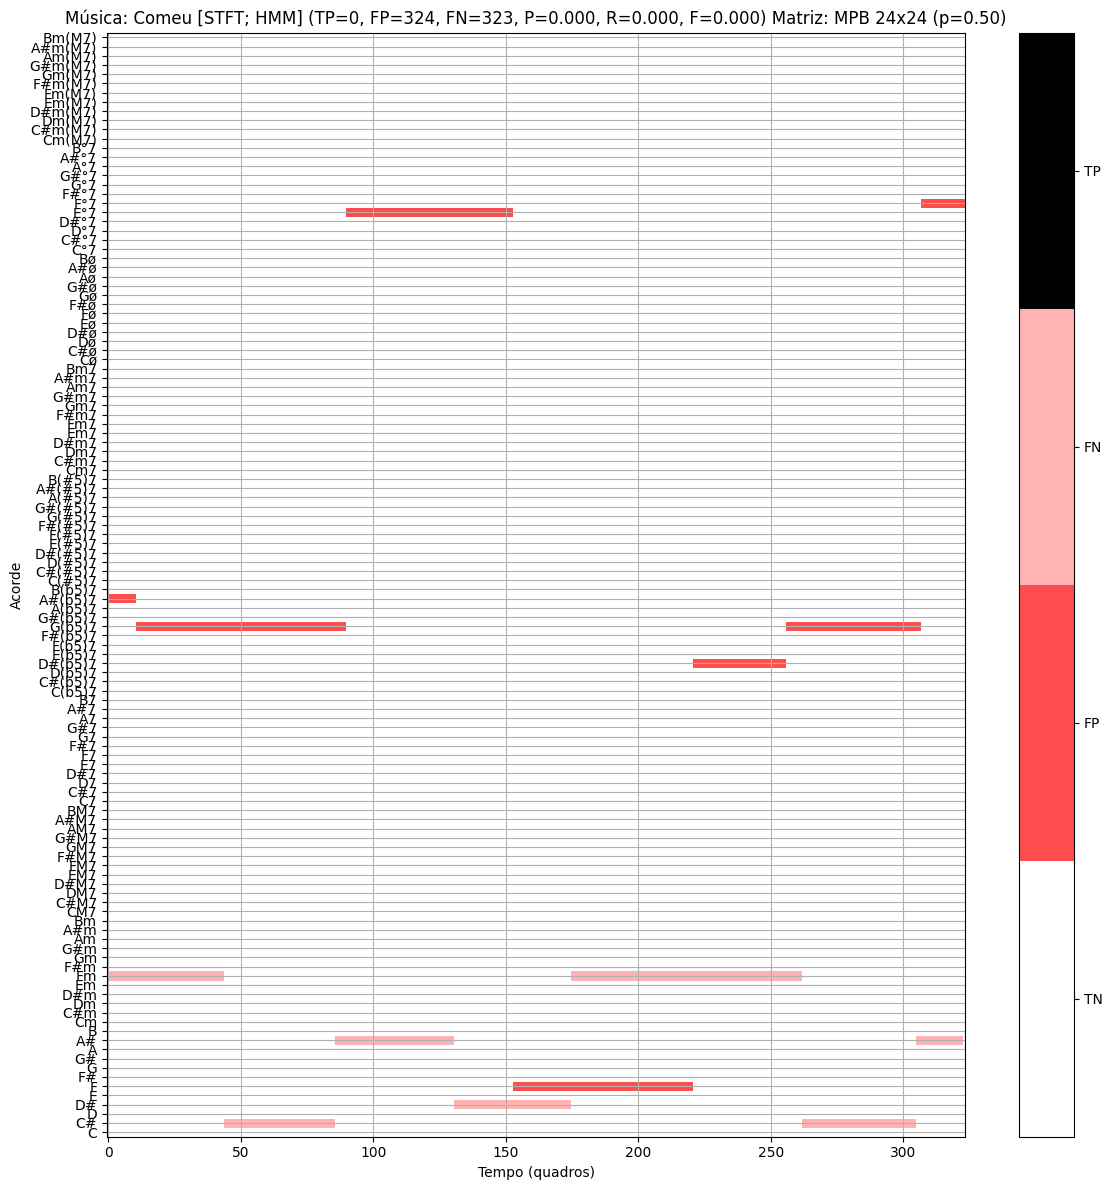

I_ref = (120, 324)
I_est=(120, 324)
I_ref = (120, 324)
I_est=(120, 324)


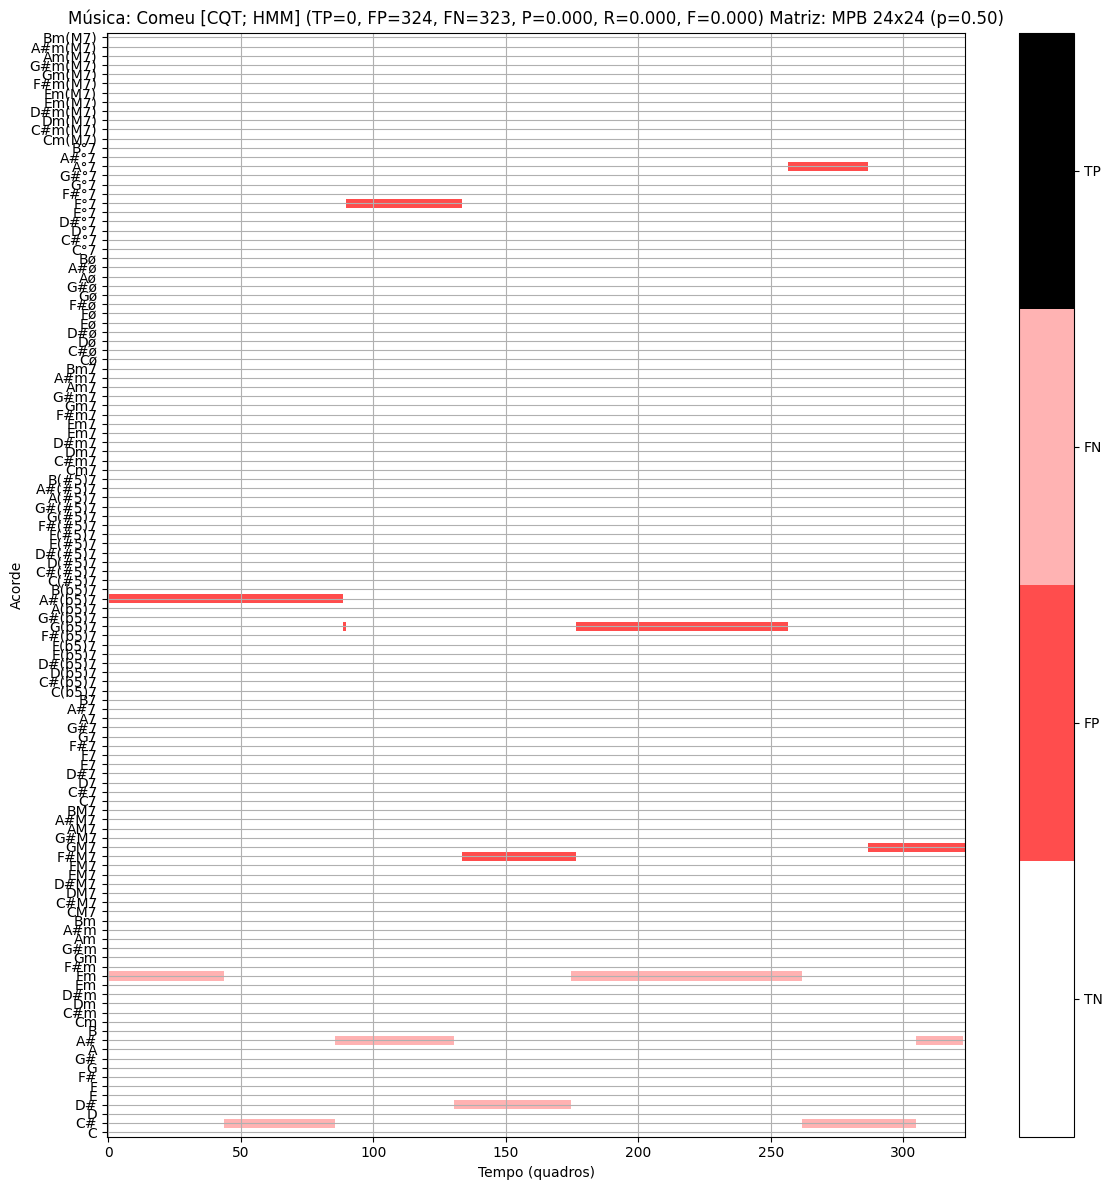

I_ref = (120, 324)
I_est=(120, 324)
I_ref = (120, 324)
I_est=(120, 324)


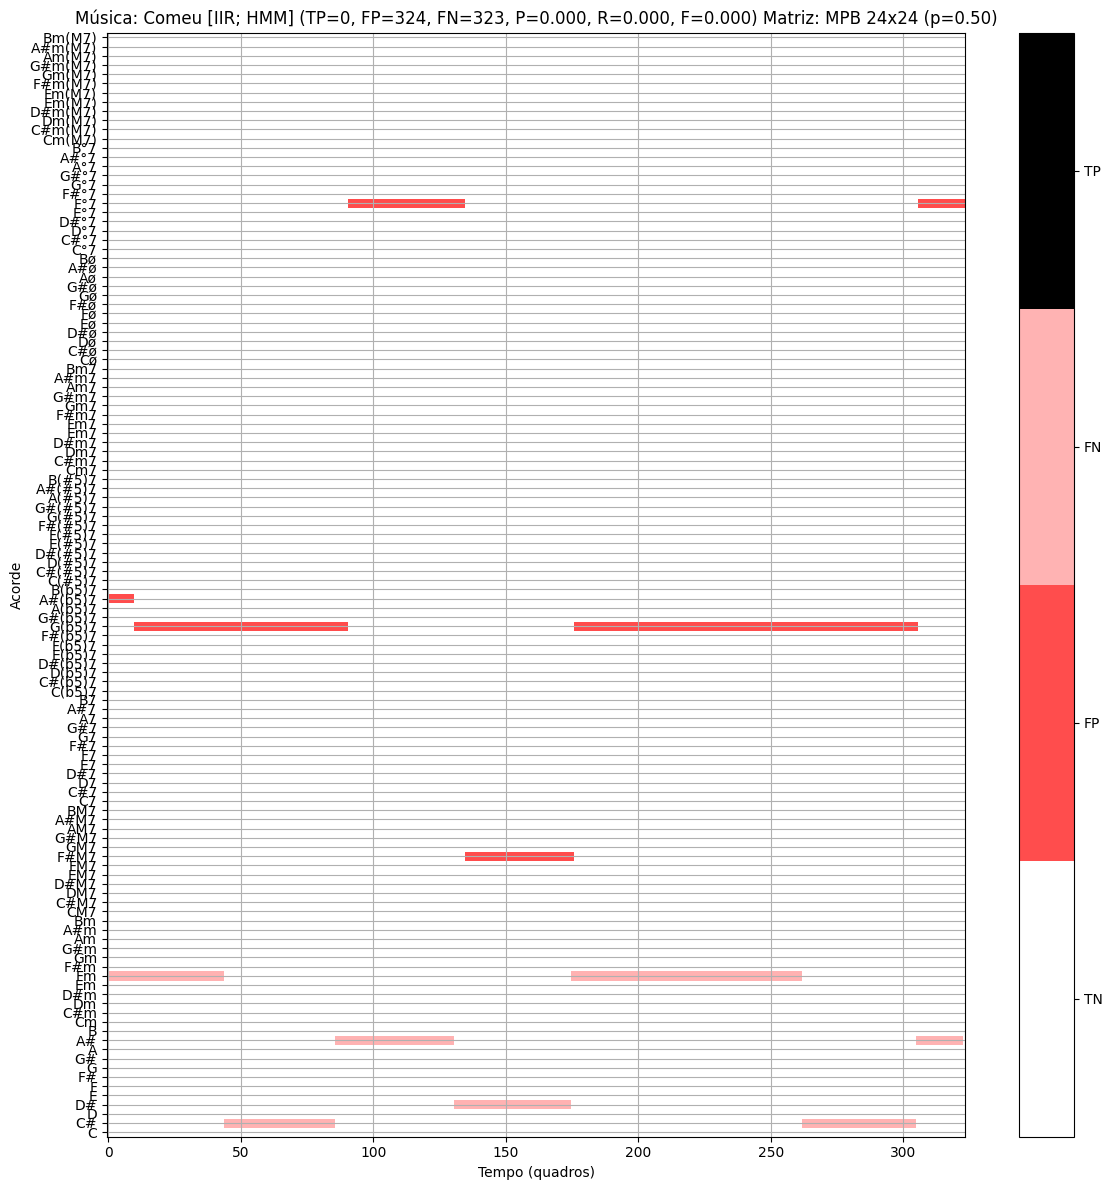

I_ref = (120, 324)
I_est=(120, 324)
I_ref = (120, 324)
I_est=(120, 324)


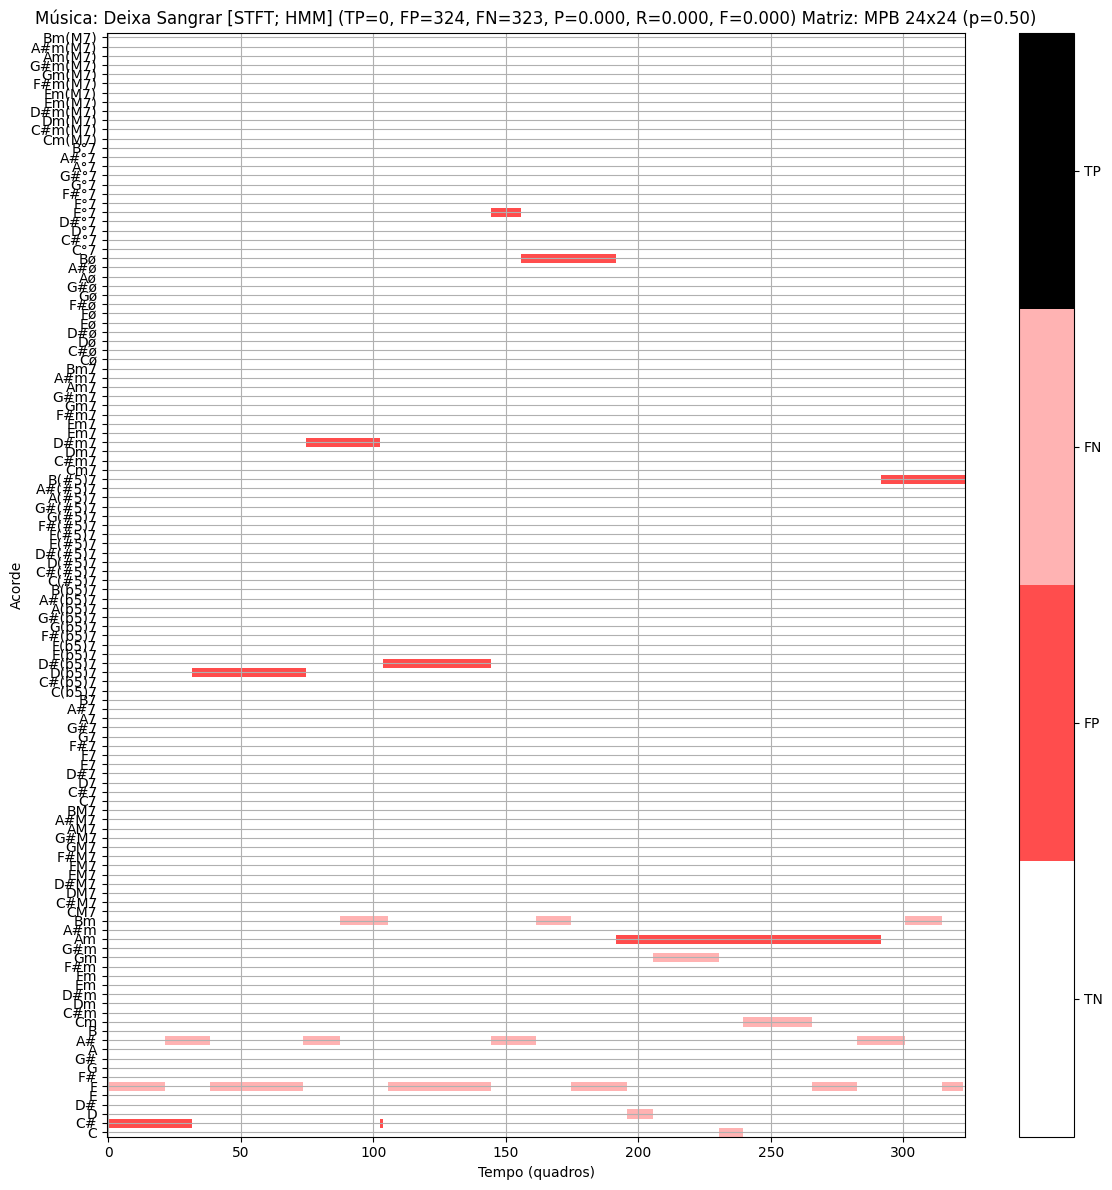

I_ref = (120, 324)
I_est=(120, 324)
I_ref = (120, 324)
I_est=(120, 324)


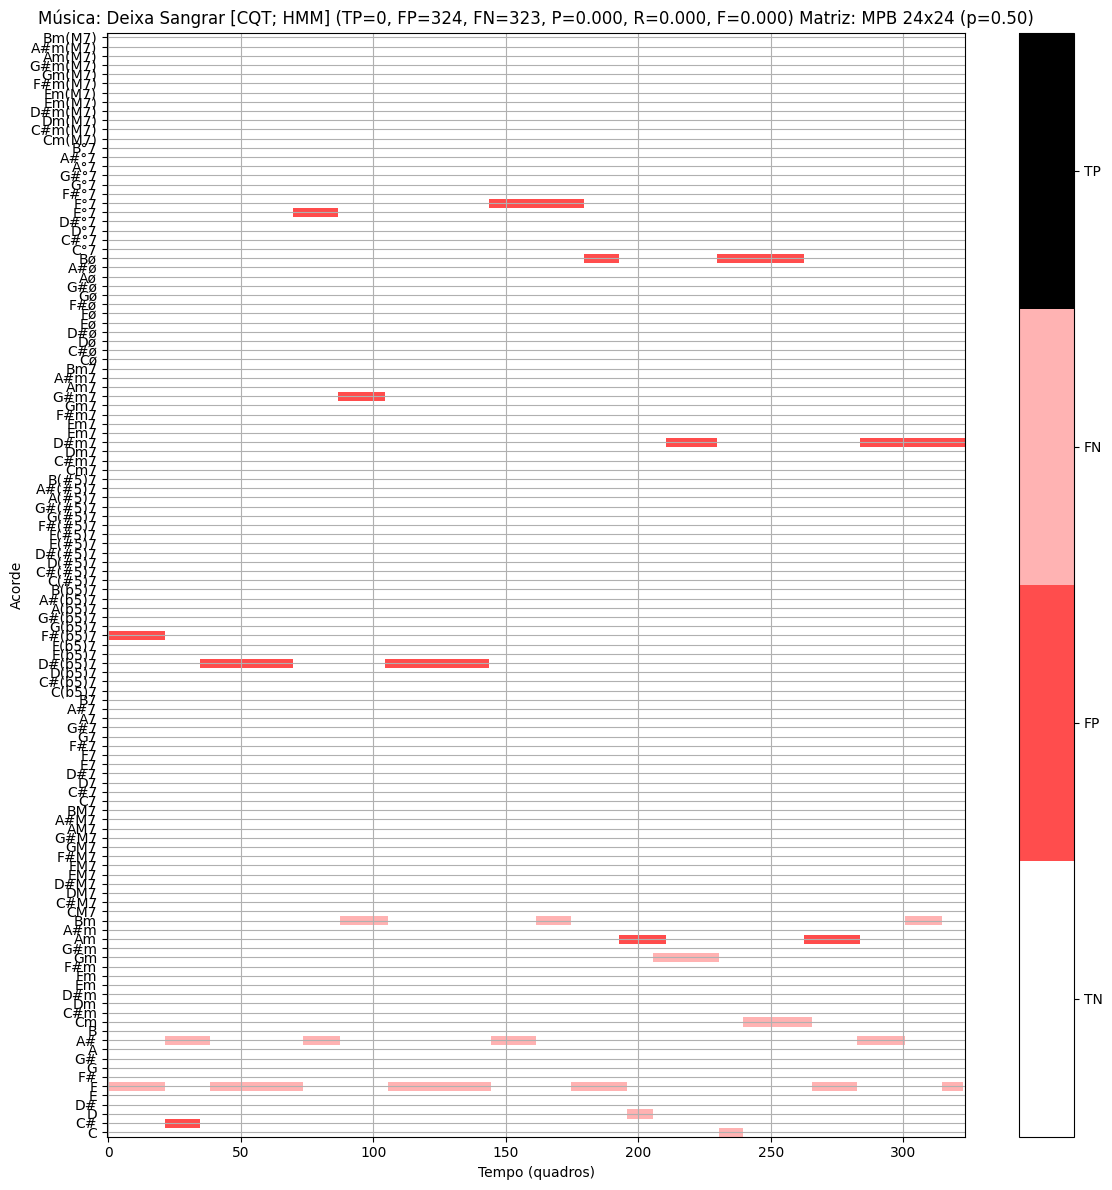

I_ref = (120, 324)
I_est=(120, 324)
I_ref = (120, 324)
I_est=(120, 324)


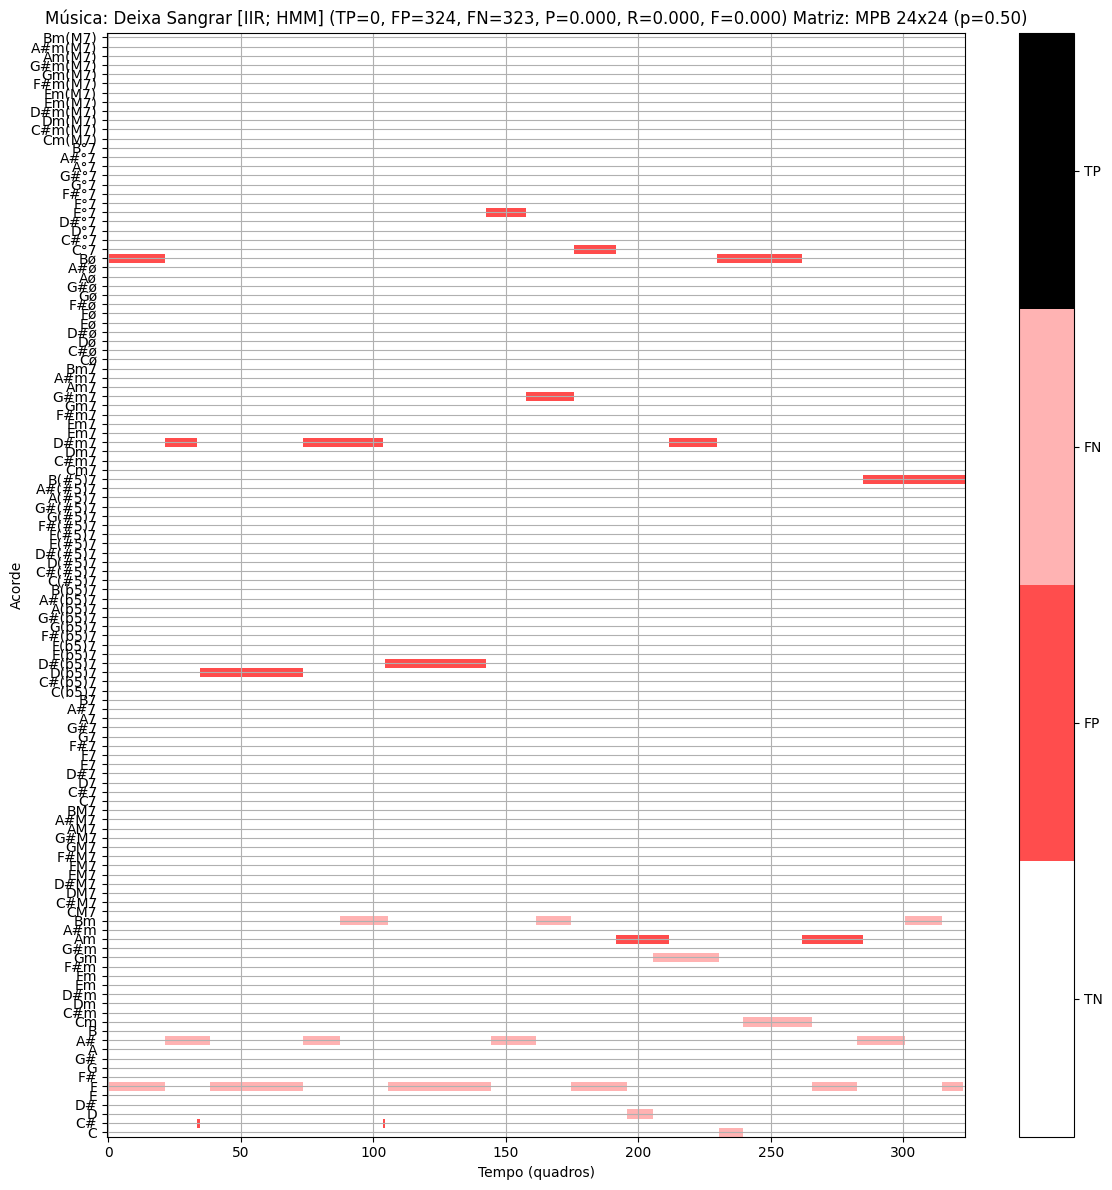

In [9]:
# Matriz mpb 120 z 120
# plt.rcParams.update({'font.size': 9})
p = 0.5
m = 2
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], df_2, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title, t_matrix=m, p=p, figsize=(12, 12))

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], df_2, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title, t_matrix=m, p=p, figsize=(12, 12))
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], df_2, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title, t_matrix=m, p=p, figsize=(12, 12))